## Python statistics essential training - 03_03_histograms

Standard imports

In [1]:
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as pp

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [3]:
import re
import mailbox
import csv

In [4]:
china1965 = pd.read_csv('income-1965-china.csv')
china2015 = pd.read_csv('income-2015-china.csv')
usa1965 = pd.read_csv('income-1965-usa.csv')
usa2015 = pd.read_csv('income-2015-usa.csv')

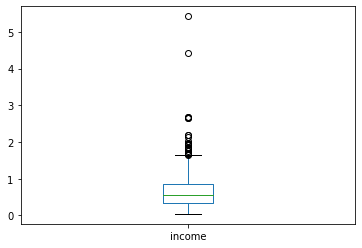

In [6]:
china1965.income.plot(kind='box')
#visualizes coverage interval. green line is median
#points below/above the whiskers (black lines) are considered outliers

In [10]:
pd.DataFrame({'usa':usa1965.income,'china':china1965.income})

,usa,china
0,21.363833,1.026259
1,30.604093,0.912053
2,50.373886,0.110699
3,59.968851,0.469659
4,21.271346,0.374626
...,...,...
995,12.581536,0.755723
996,27.645154,0.608742
997,15.964374,0.422609
998,31.520078,0.680230


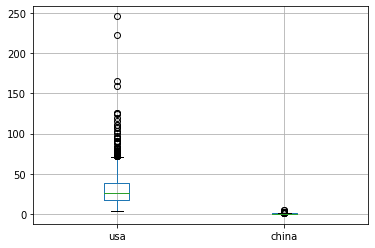

In [14]:
pd.DataFrame({'usa':usa1965.income,'china':china1965.income}).boxplot()

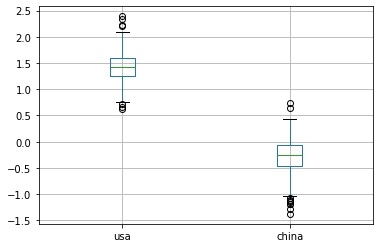

In [15]:
#make box plots of the logarithm to visualize incomes on same scale
pd.DataFrame({'usa':usa1965.log10_income,'china':china1965.log10_income}).boxplot()

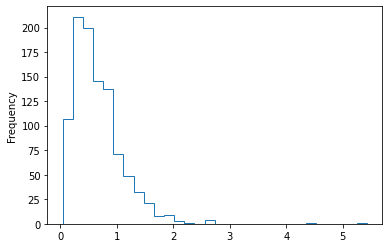

In [16]:
china1965.income.plot(kind='hist',histtype='step',bins=30)

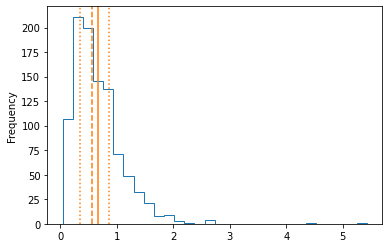

In [17]:
china1965.income.plot(kind='hist',histtype='step',bins=30)

pp.axvline(china1965.income.mean(),c='C1')
pp.axvline(china1965.income.median(),c='C1',linestyle='--')
pp.axvline(china1965.income.quantile(0.25),c='C1',linestyle=':')
pp.axvline(china1965.income.quantile(0.75),c='C1',linestyle=':')

(0.0, 3.0, 0.0, 1.2342999882944066)

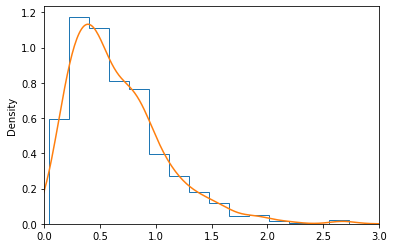

In [19]:
#intensity plot
china1965.income.plot(kind='hist',histtype='step',bins=30,density=True)
china1965.income.plot.density()
pp.axis(xmin=0,xmax=3)

(0.0, 3.0, 0.0, 1.308676977766924)

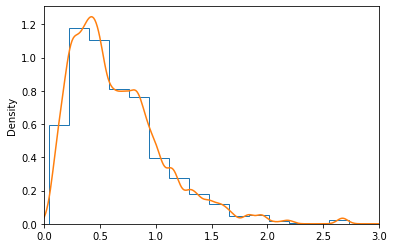

In [21]:
#density is just an approximation because we don't have access to the entire distribution
#intensity plot
china1965.income.plot(kind='hist',histtype='step',bins=30,density=True)
china1965.income.plot.density(bw_method=0.1) #change the bandwidth to obtain more detail
#bandwidth changes the individual kernels and significantly affects the final result of the plot
pp.axis(xmin=0,xmax=3)

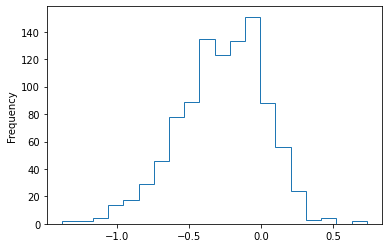

In [22]:
china1965.log10_income.plot(kind='hist',histtype='step',bins=20)

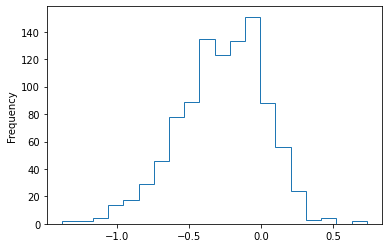

In [23]:
#same result (??)
china1965.log10_income.plot.hist(histtype='step',bins=20)

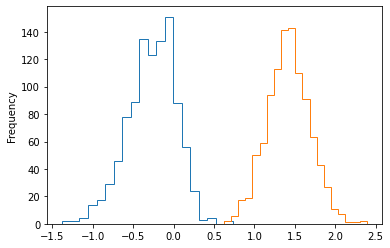

In [24]:
china1965.log10_income.plot.hist(histtype='step',bins=20)
usa1965.log10_income.plot.hist(histtype='step',bins=20)

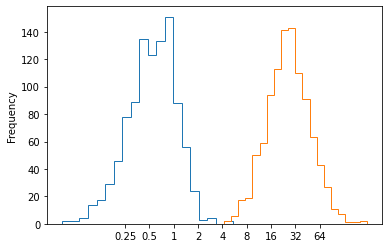

In [26]:
china1965.log10_income.plot.hist(histtype='step',bins=20)
usa1965.log10_income.plot.hist(histtype='step',bins=20)

levels = [0.25,0.5,1,2,4,8,16,32,64]
pp.xticks(np.log10(levels),levels);

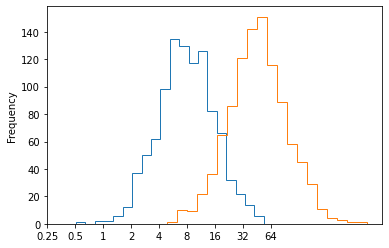

In [27]:
china2015.log10_income.plot.hist(histtype='step',bins=20)
usa2015.log10_income.plot.hist(histtype='step',bins=20)

levels = [0.25,0.5,1,2,4,8,16,32,64]
pp.xticks(np.log10(levels),levels);

In [28]:
#in 2015, US and China are richer and some overlap

In [29]:
gapminder = pd.read_csv('gapminder.csv')

In [30]:
china_pop2015 = float(gapminder.query('country == "China" and year == 2015').population)
usa_pop2015 = float(gapminder.query('country == "United States" and year == 2015').population)

In [31]:
china2015['weight'] = china_pop2015 / len(china2015)
usa2015['weight'] = usa_pop2015 / len(usa2015)

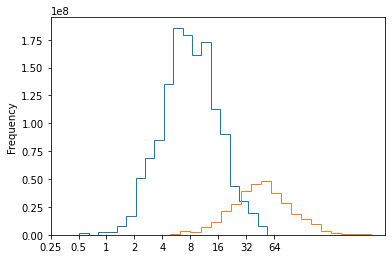

In [32]:
china2015.log10_income.plot.hist(histtype='step',bins=20,weights=china2015.weight)
usa2015.log10_income.plot.hist(histtype='step',bins=20,weights=usa2015.weight)

levels = [0.25,0.5,1,2,4,8,16,32,64]
pp.xticks(np.log10(levels),levels);